1. Підготовка середовища
Імпорт необхідних бібліотек:

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)

Завантаження даних:

In [25]:
df = sns.load_dataset("titanic")
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


2. Ознайомлення з даними
Виведення основної інформації:

In [26]:
print(df.describe())
print(df.info())
print(df.isnull().sum())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891

3. Попередня обробка даних

In [27]:
# Перевіряємо, чи присутня колонка 'age', та заповнюємо пропуски
if 'age' in df.columns:
    df['age'] = df['age'].fillna(df['age'].mean())

# Перевіряємо, чи присутня колонка 'embarked', та заповнюємо пропуски
if 'embarked' in df.columns:
    if df['embarked'].isnull().sum() > 0:  # Перевіряємо, чи є пропуски
        df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
else:
    # Якщо колонки немає, створюємо її з дефолтним значенням 'S'
    df['embarked'] = 'S'

# Закодування категоріальних змінних (One-Hot Encoding)
categorical_cols = ['sex', 'embarked']
existing_categorical = [col for col in categorical_cols if col in df.columns]
df = pd.get_dummies(df, columns=existing_categorical, drop_first=True)

# Створення нової ознаки FamilySize
if 'sibsp' in df.columns and 'parch' in df.columns:
    df['family_size'] = df['sibsp'] + df['parch']

# Перевіряємо наявність колонок перед видаленням
columns_to_drop = ['alive', 'class', 'who', 'adult_male', 'deck', 'embark_town']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)


4. Поділ даних на тренувальну та тестову вибірки

In [28]:
X = df.drop(columns=['survived'])  # Незалежні змінні
y = df['survived']                # Цільова змінна

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Побудова моделей

In [29]:
# Логістична регресія
log_model = LogisticRegression(max_iter=300, solver='liblinear', random_state=42)  # Додав solver для кращої стабільності
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_accuracy = log_model.score(X_test, y_test)  # Обчислення точності

print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

# Дерево рішень
tree_model = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)  # Використано критерій ентропії
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
tree_accuracy = tree_model.score(X_test, y_test)

print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")

# Випадковий ліс
forest_model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42, oob_score=True)  # Додано більше дерев та oob оцінку
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
forest_accuracy = forest_model.score(X_test, y_test)

print(f"Random Forest Accuracy: {forest_accuracy:.2f}")



Logistic Regression Accuracy: 0.80
Decision Tree Accuracy: 0.80
Random Forest Accuracy: 0.83


6. Оцінка метрик

In [30]:
def evaluate_model(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

print("Logistic Regression:")
evaluate_model(y_test, y_pred_log)

print("\nDecision Tree:")
evaluate_model(y_test, y_pred_tree)

print("\nRandom Forest:")
evaluate_model(y_test, y_pred_forest)


Logistic Regression:
Accuracy: 0.7988826815642458
Precision: 0.7878787878787878
Recall: 0.7027027027027027
F1 Score: 0.7428571428571429

Decision Tree:
Accuracy: 0.8044692737430168
Precision: 0.8305084745762712
Recall: 0.6621621621621622
F1 Score: 0.7368421052631579

Random Forest:
Accuracy: 0.8324022346368715
Precision: 0.84375
Recall: 0.7297297297297297
F1 Score: 0.782608695652174


7. Матриця плутанини та ROC-крива

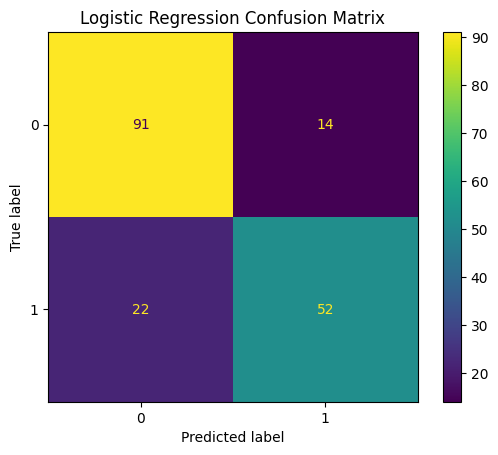

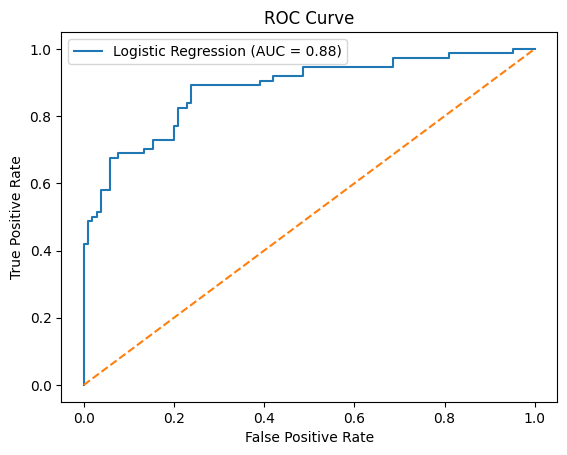

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

y_pred_prob_log = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_log)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


8. Оптимізація моделі

In [32]:
cv_scores = cross_val_score(tree_model, X, y, cv=5)
print("Cross-validated scores (Decision Tree):", cv_scores)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Cross-validated scores (Decision Tree): [0.81564246 0.80337079 0.80898876 0.78651685 0.85955056]
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


9. Аналіз важливості ознак

       Feature  Importance
6     sex_male    0.324315
4         fare    0.227102
1          age    0.199618
0       pclass    0.095048
9  family_size    0.058861
2        sibsp    0.027124
8   embarked_S    0.025088
3        parch    0.023793
5        alone    0.010063
7   embarked_Q    0.008987


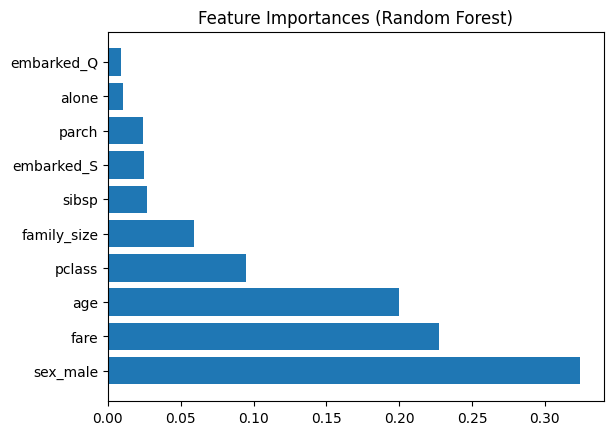

In [33]:
importances = forest_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances (Random Forest)")
plt.show()
